# Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import skew
import statsmodels.api as sm
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load Data
data = pd.read_csv('./insurance.csv')
data = data.rename(columns={'sex': 'gender'})
data.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Drop Duplicates
data = data.drop_duplicates()

In [4]:
# 1. EDA - Check basic statistics and data types
print("Data Types and Basic Statistics:")
print(data.info())
print("\nBasic Statistics:")
print(data.describe())

Data Types and Basic Statistics:
<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   gender    1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB
None

Basic Statistics:
               age          bmi     children       charges
count  1337.000000  1337.000000  1337.000000   1337.000000
mean     39.222139    30.663452     1.095737  13279.121487
std      14.044333     6.100468     1.205571  12110.359656
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.290000     0.000000   4746.344000
50%      39.000000    30.400000     1.000000   9386.161300
75%      51.000

In [5]:
# 2. Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
age         0
gender      0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


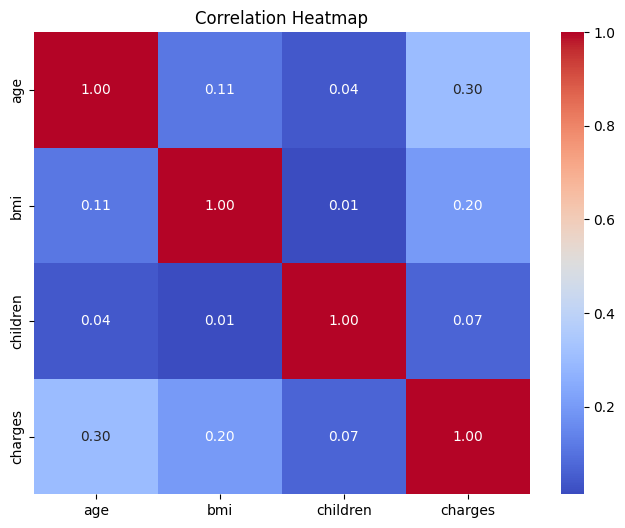

In [6]:
# 3. Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

<Figure size 1200x1000 with 0 Axes>

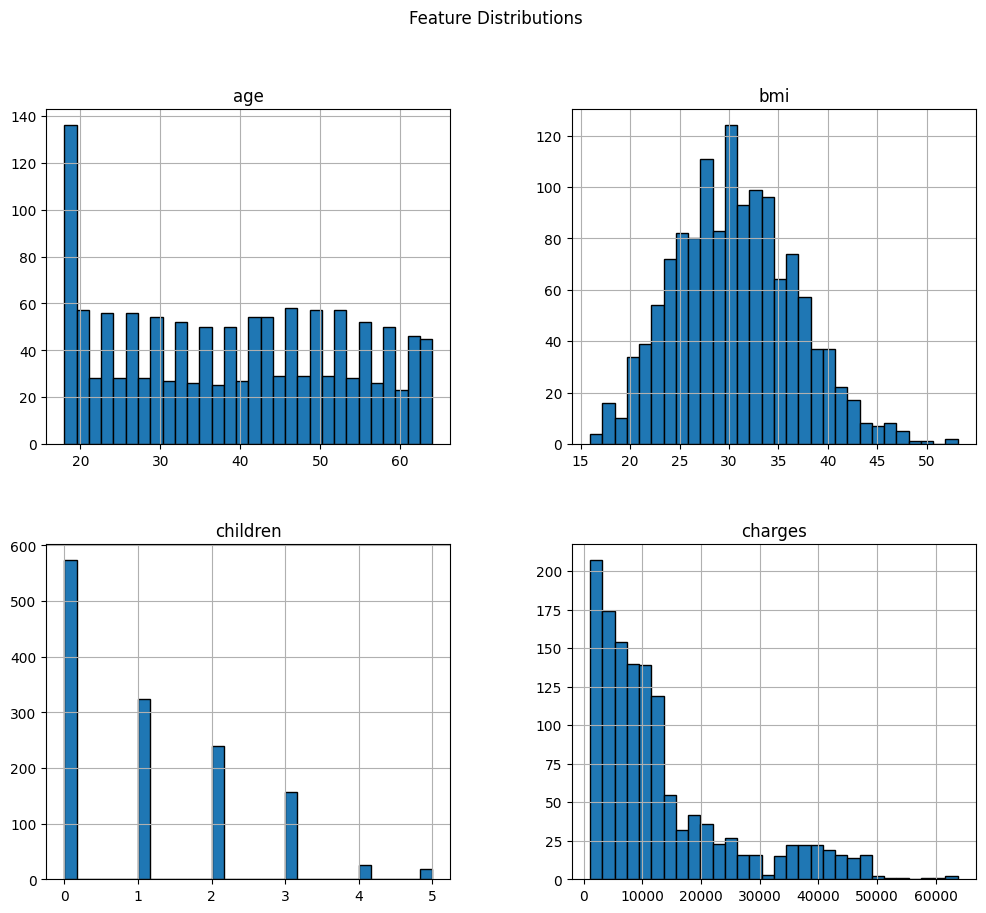

In [7]:
# 4. Distribution of features - Histograms
plt.figure(figsize=(12, 10), layout='constrained')
data.hist(bins=30, figsize=(12, 10), edgecolor='black')
plt.suptitle("Feature Distributions")
plt.show()

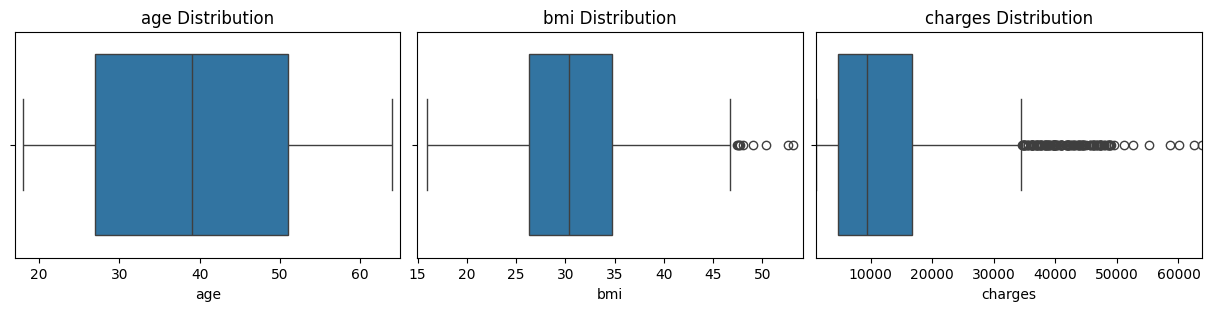

In [8]:
# 5. Boxplots for continuous variables to detect outliers
features = ['age', 'bmi', 'charges']
plt.figure(figsize=(12, 3), layout='constrained')
for i, col in enumerate(features):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(data, x=col)
    plt.title(f'{col} Distribution')
    plt.xlim(data[col].min() - 1, data[col].max() + 1)
plt.show()

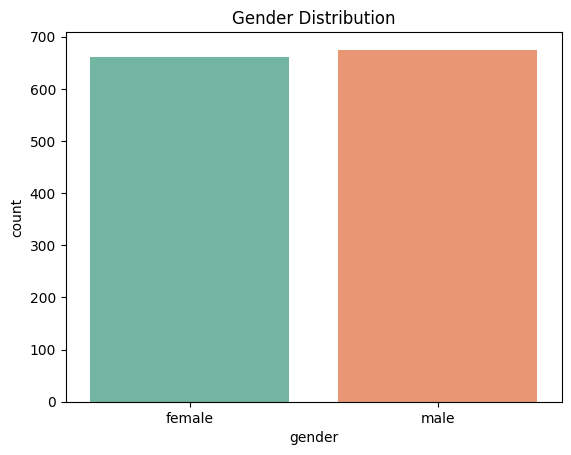

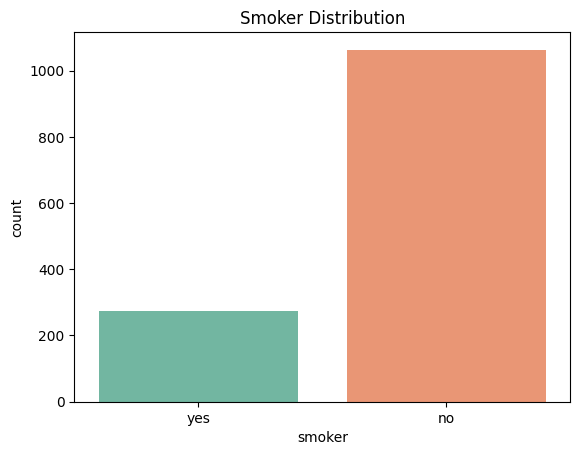

In [9]:
# 7. Visualize categorical variables
sns.countplot(data=data, x='gender', palette='Set2')
plt.title("Gender Distribution")
plt.show()

sns.countplot(data=data, x='smoker', palette='Set2')
plt.title("Smoker Distribution")
plt.show()

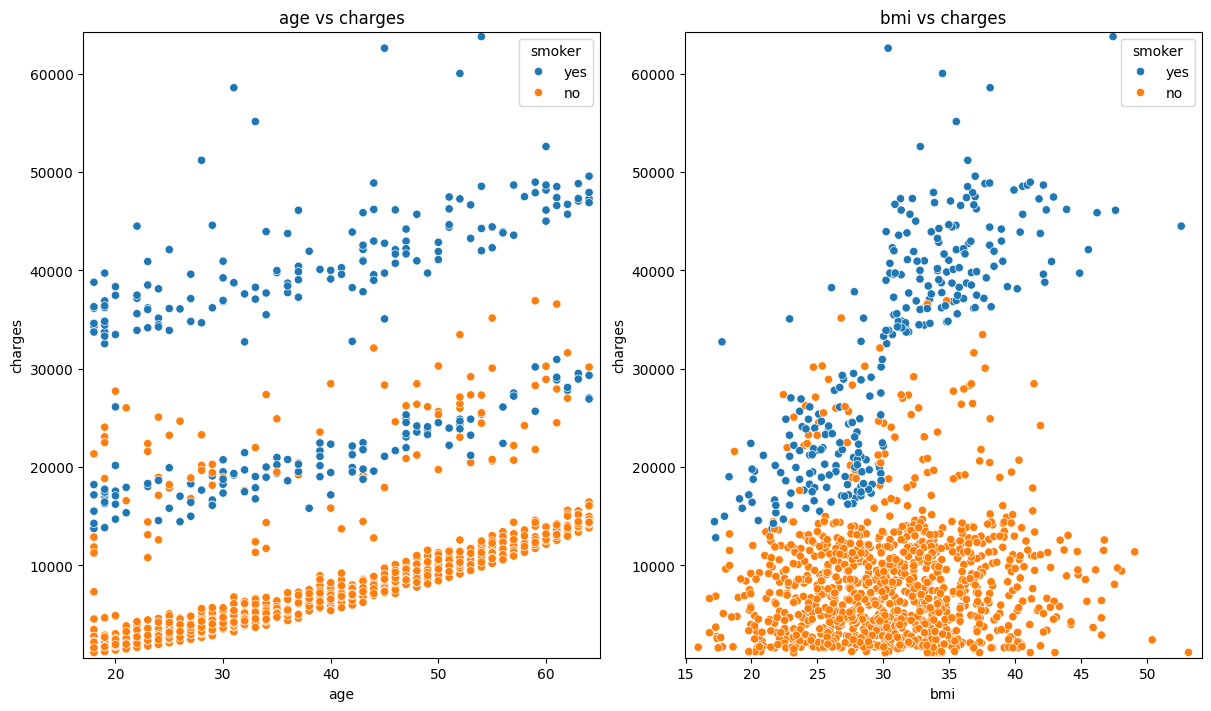

In [10]:
# 8. Scatter Plots to visualize relationships with charges
plt.figure(figsize=(12, 7), layout='constrained')
for i, col in enumerate(['age', 'bmi']):
    plt.subplot(1, 2, i + 1)
    sns.scatterplot(data, x=col, y='charges', hue='smoker')
    plt.title(f'{col} vs charges')
    plt.xlim(data[col].min() - 1, data[col].max() + 1)
    plt.ylim(data['charges'].min() - 500, data['charges'].max() + 500)
plt.show()

In [11]:
# 9. Skewness check on 'charges' variable
print(f"Skewness (original charges): {skew(data['charges']):.4f}")

Skewness (original charges): 1.5137


In [12]:
# 10. Log-transform charges to correct skewness
encoded = data.copy()
encoded['log_charges'] = np.log(encoded['charges'] + 1)  # Adding 1 to avoid log(0)
print(f"Skewness (log-transformed charges): {skew(encoded['log_charges']):.4f}")

Skewness (log-transformed charges): -0.0895


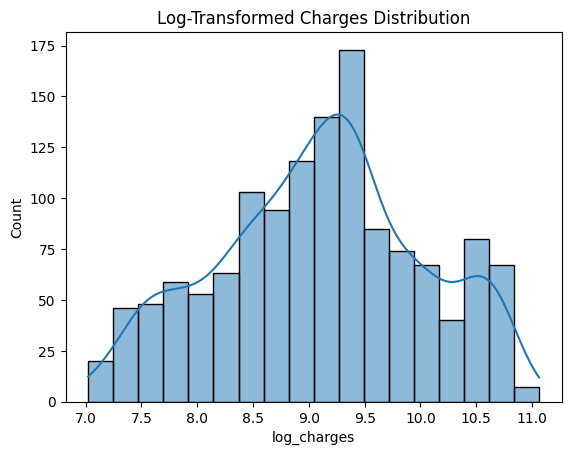

In [13]:
# Visualize Log-Transformed Charges
sns.histplot(encoded['log_charges'], kde=True)
plt.title("Log-Transformed Charges Distribution")
plt.show()

In [14]:
# Encode Categorical Variables
encoded['gender'] = encoded['gender'].map({'male': 1, 'female': 0})
encoded['smoker'] = encoded['smoker'].map({'yes': 1, 'no': 0})

In [15]:
# Encode the 'region' column using Ordinal Encoding
enc = OrdinalEncoder()
encoded['region'] = enc.fit_transform(encoded[['region']])

In [16]:
# 11. Split Data into Train and Test (80:20)
X = encoded.drop(columns=['charges', 'log_charges'])
y = encoded['log_charges']  # Use log-transformed target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")

Train size: 1069, Test size: 268


In [17]:
# OLS Regression with statsmodels
X2 = sm.add_constant(X_train) 
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary()) 

                            OLS Regression Results                            
Dep. Variable:            log_charges   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     528.0
Date:                Wed, 18 Dec 2024   Prob (F-statistic):          1.57e-314
Time:                        10:36:43   Log-Likelihood:                -673.07
No. Observations:                1069   AIC:                             1360.
Df Residuals:                    1062   BIC:                             1395.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0685      0.081     87.585      0.0

In [18]:
# Predict on Test Set
X_test2 = sm.add_constant(X_test)  # Add constant term to the test set
y_test_pred = est2.predict(X_test2)  # Predict using OLS

In [19]:
# Inverse log-transform predictions
y_test_pred_exp = np.exp(y_test_pred) - 1
y_test_exp = np.exp(y_test) - 1

In [20]:
# 14. Evaluate Model on Test Set
test_rmse = np.sqrt(mean_squared_error(y_test_exp, y_test_pred_exp))
test_r2 = r2_score(y_test_exp, y_test_pred_exp)

print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test R2 Score: {test_r2:.4f}")

Test RMSE: 7205.8864
Test R2 Score: 0.7174


In [21]:
# Save predictions to CSV
test_results = pd.DataFrame({'Actual': y_test_exp, 'Predicted': y_test_pred_exp})
test_results.to_csv('test_predictions.csv', index=False)

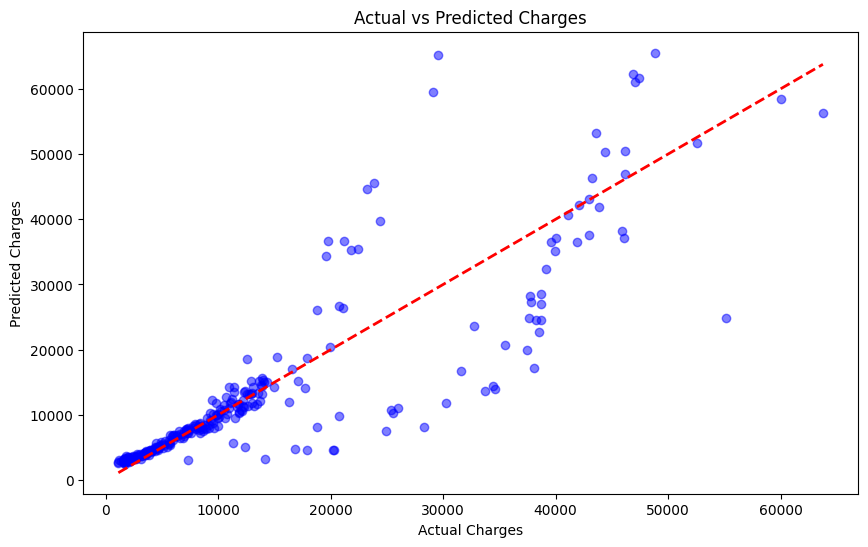

In [22]:
# Plot Actual vs Predicted Charges
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted values
plt.scatter(y_test_exp, y_test_pred_exp, color='blue', alpha=0.5)

# Plot a line for perfect predictions (y = x)
plt.plot([min(y_test_exp), max(y_test_exp)], [min(y_test_exp), max(y_test_exp)], color='red', linestyle='--', lw=2)

# Labeling the plot
plt.title('Actual vs Predicted Charges')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.show()

# Gauss-Marcov assumptions

### Mean of the residuals = 0


In [23]:
residuals = y_train - est2.fittedvalues
print(f"Mean of residuals: {residuals.mean():}")

Mean of residuals: -1.168424052033944e-14


### Homoskedasticity / Heteroskedasticity

In [24]:
from statsmodels.stats.diagnostic import het_goldfeldquandt

# Goldfeld-Quandt test
gq_test = het_goldfeldquandt(residuals, X_train)
print(f"Goldfeld-Quandt Test statistic: {gq_test[0]:.4f}")
print(f"P-value: {gq_test[1]:.4f}")

# there is no significant evidence of heteroskedasticity in my dataset

Goldfeld-Quandt Test statistic: 0.8935
P-value: 0.9021


In [25]:
# Durbin-Watson test for autocorrelation
from statsmodels.stats.stattools import durbin_watson
dw_stat = durbin_watson(residuals)
print(f"Durbin-Watson statistic: {dw_stat:}")

Durbin-Watson statistic: 1.87154075184791


### endogeneity test

In [26]:
# Correlation between residuals and independent variables
residuals = est2.resid
correlations = X_train.corrwith(residuals)
print("Correlation between residuals and independent variables:")
print(correlations)

Correlation between residuals and independent variables:
age        -4.384779e-15
gender      7.577059e-16
bmi         1.233938e-15
children    2.592880e-15
smoker      1.237009e-15
region      3.175586e-15
dtype: float64


### jarque_bera test

In [27]:
from scipy.stats import jarque_bera

# Compute skewness and kurtosis
skewness = residuals.skew()
kurtosis = residuals.kurtosis()

# Jarque-Bera test
jb_stat, jb_p_value = jarque_bera(residuals)
print(f"Jarque-Bera statistic: {jb_stat:.4f}")
print(f"P-value: {jb_p_value:}")


# The residuals do not follow a normal distribution according to the Jarque-Bera test.

Jarque-Bera statistic: 1291.9008
P-value: 2.9329088989657873e-281
